<a href="https://colab.research.google.com/github/Snigdhahota/Snigdhahota/blob/main/snigdha_labor_efficiency_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/archive (5).zip'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [ ]:
data=pd.read_csv("/content/archive (5).zip")

ValueError: ignored

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
data.describe(include=object).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
data['Attrition'] = data['Attrition'].factorize(['No','Yes'])[0]
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
def plot_distribution(var_select, bin_size):


    corr = data['Attrition'].corr(data[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    hist_data = [tmp1, tmp2]

    group_labels = ['Yes_attrition', 'No attrition']
    colors = ['#FFD700', '7EC0EE']

    fig = ff.create_displot(hist_data, group_labels, colors = colors, show_hist=True,
                           curve_type='kde', bin_size=bin_size)

    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    py.iplot(fig, filename = 'Density plot')

    def barplot(var_select, x_no_numeric) :

        tmp1 = data[(data['Attrition'] != 0)]
        tmp2 = data[(data['Attrition'] == 0)]
        tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Attrition']), )
        tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  :
        tmp3 = tmp3.sort_values(1, ascending = False)

    color=['#B9C0C9','yellow' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition', marker=dict(
        color='yellow',
        line=dict(color='#000000',width=1)))

    trace2=go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
    )
    trace3 =  go.Scatter(
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.9, marker=dict(
        color='darkblue',
        line=dict(color='#000000',width=0.5
        )))


    layout = dict(title =  str(var_select),
              xaxis=dict(),
              yaxis=dict(title= 'Count'),
              yaxis2=dict(range= [-0, 75],
                          overlaying= 'y',
                          anchor= 'x',
                          side= 'right',
                          zeroline=False,
                          showgrid= False,
                          title= '% Attrition'
                         ))
    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [ ]:

def plot_pie(var_select):

    colors = ['#B9C0C9', '#CED2FD', '#ceb0ff', 'lightskyblue', 'lightgrey', '#EAB9FC', 'cyan',
  '#DDC8FE']
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[var_select].value_counts().values.tolist(),
                    labels  = no_attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15),
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )
    layout = go.Layout(dict(title = var_select + " distribution in employees attrition ",
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))


    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [ ]:
#Distribution of Attrition
attrition = data[(data['Attrition'] != 0)]
no_attrition = data[(data['Attrition'] == 0)]

trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = data['Attrition'].value_counts(),
               textfont=dict(size=15),
               marker=dict(colors=['#B9C0C9','yellow'],
               line=dict(color='#000000', width=1.5)))
layout = dict(title =  'Distribution of attrition variable')
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [ ]:



plot_pie('Gender')
barplot('Gender', False)


NameError: ignored

In [ ]:
# Effect of age on attrition
barplot('Age', False)

In [ ]:
plot_df=data.sort_values(by="Attrition")
fig=px.histogram(plot_df, x='MonthlyIncome', color='Attrition',
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#B9C0C9','No': '#CDBBA7'})
fig.update_layout(title_text='Distribution of Monthly Income by Attrition Status',
                  xaxis_title='Monthly Income, $', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show()

In [ ]:
import matplotlib.pyplot as plt
plot_pie('Department')
barplot('Department',True)

In [ ]:

sats_att=data.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(sats_att,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Environment Satisfaction level Counts of People in an Organization')


KeyError: ignored

In [ ]:
barplot('BussinessTravel', False)

In [ ]:
barplot('DistanceFromHome', False)


In [ ]:
jsats_att=data.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(jsats_att,x='JobSatisfaction',y='Counts',color='Attrition',title='Job Satisfaction level Counts of People in an Organization')


In [ ]:
barplot('JobSatisfaction',False)

In [ ]:
stock_att=data.groupby(['StockOptionLevel','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(stock_att,x='StockOptionLevel',y='Counts',color='Attrition',title='Stock facilities level wise People in an Organization')

In [ ]:
barplot('WorkLifeBalance', False)

In [ ]:
ncwrd_att=data.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(ncwrd_att,x='NumCompaniesWorked',y='Counts',color='Attrition',title='Work Experience level Counts of People in an Organization')

In [ ]:
barplot('YearsInCurrentRole', False)

In [ ]:
barplot('PercentSalaryHike', False)

In [ ]:
px.box(data, x="YearsAtCompany")

In [ ]:
man_att=data.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(man_att,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of people spending years with a Manager in an Organization')

In [ ]:
barplot('YearsWithCurrManager', False)


In [ ]:
for column in data.columns:
    print(f"{column}: Number of unique values {data[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

In [ ]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis='columns',inplace=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


<ipython-input-26-90d7341002d9>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

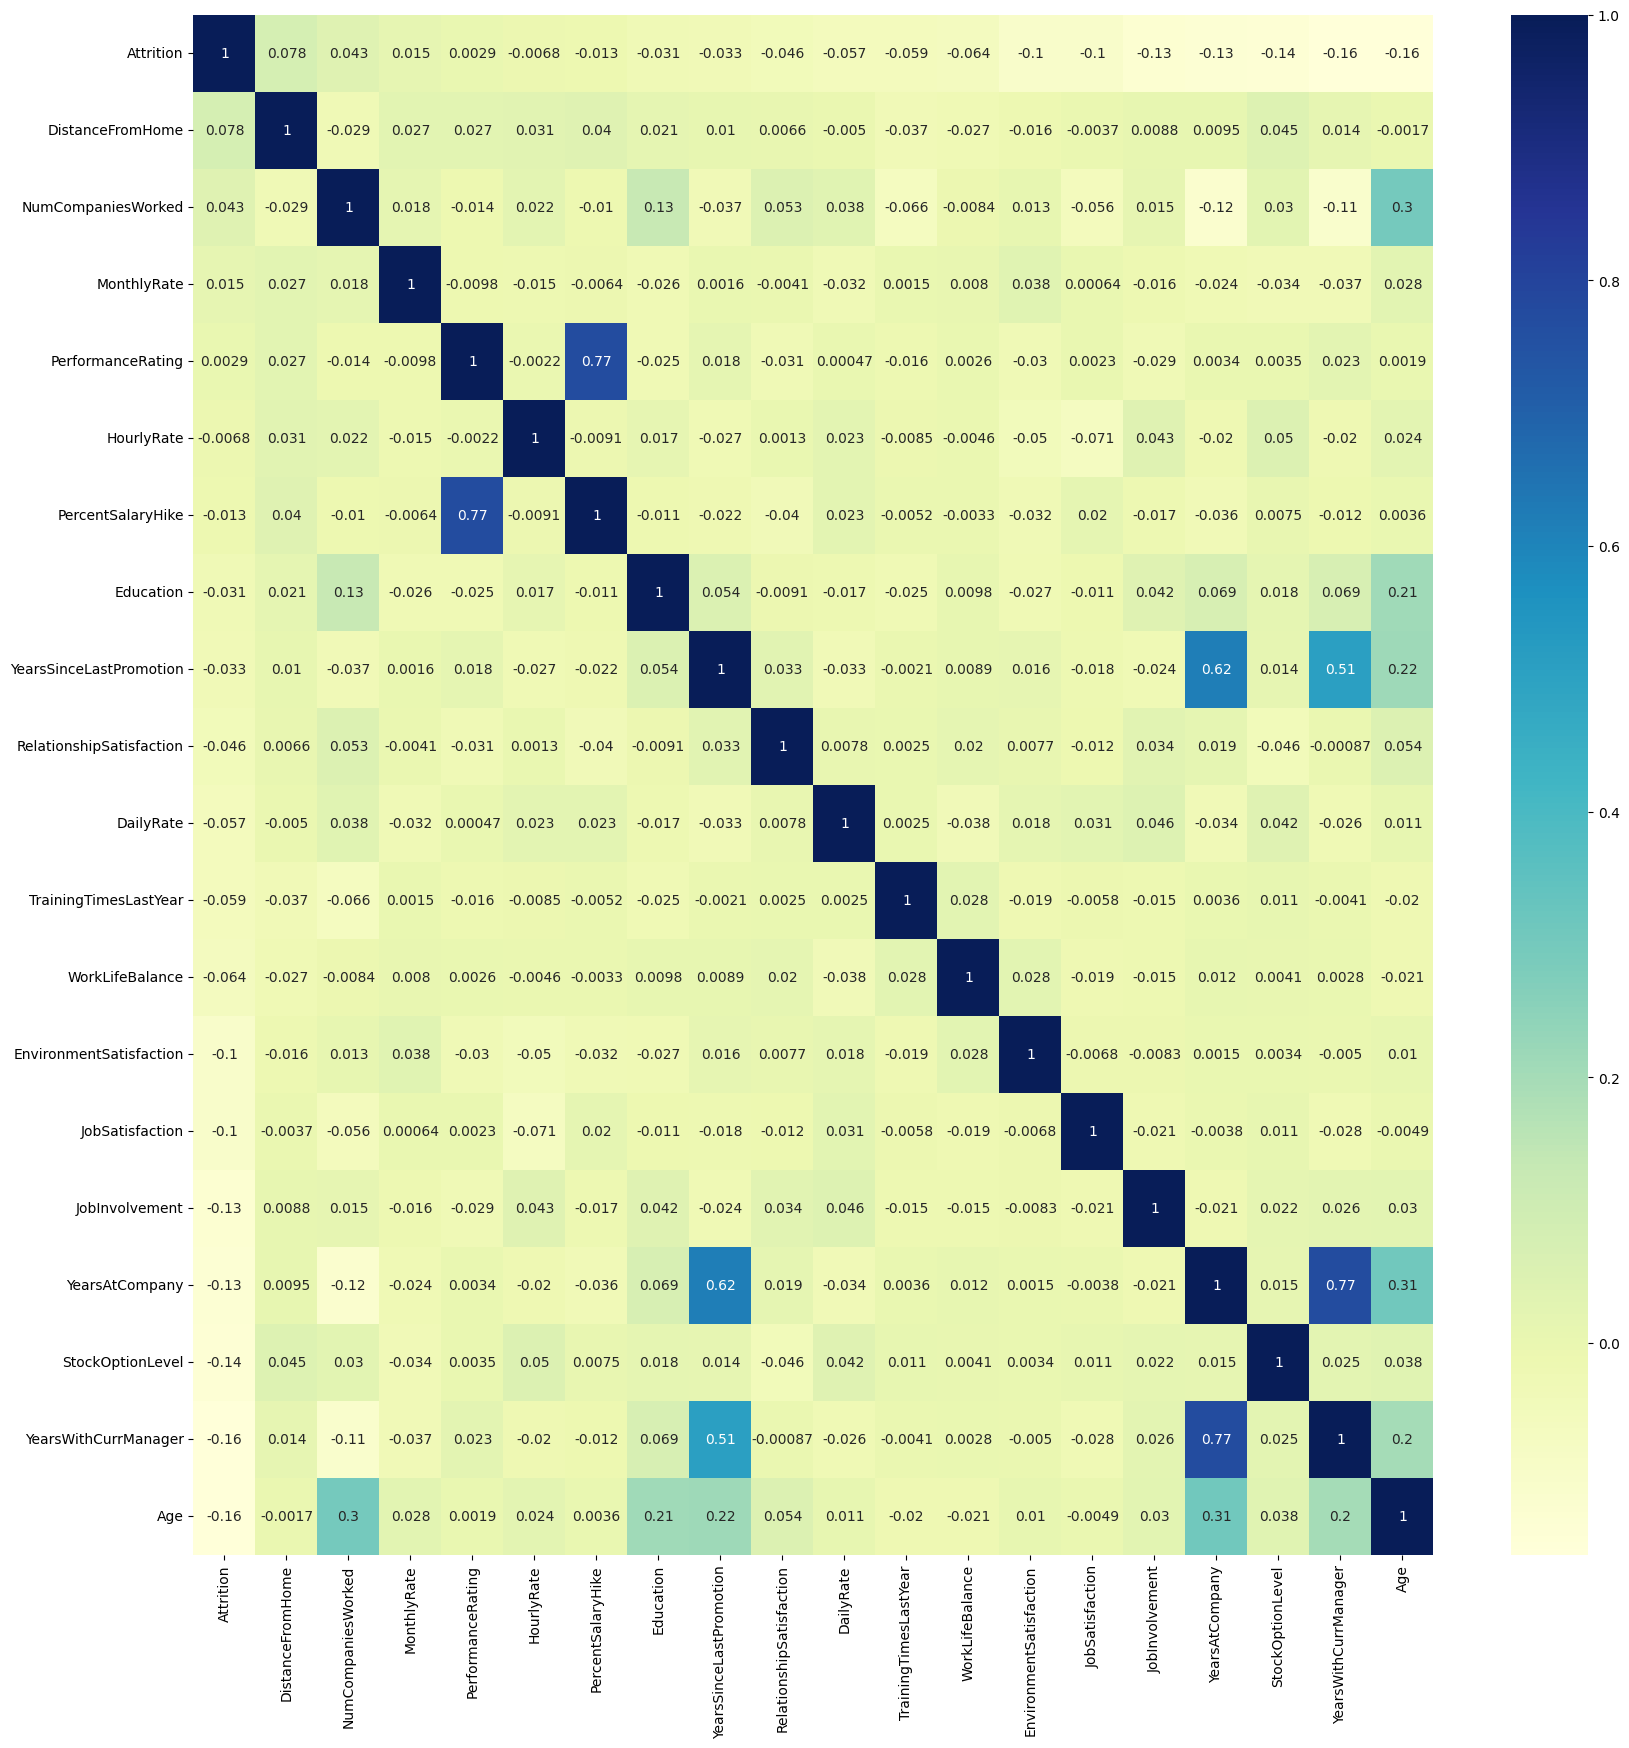

In [ ]:
col = data.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(20,20))
sns.heatmap(data[col].corr(), annot=True, cmap="YlGnBu", annot_kws={"size":10})

In [ ]:
dummy_col = [column for column in data.drop('Attrition', axis=1).columns if data[column].nunique() < 20]
data = pd.get_dummies(data, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [ ]:
print(data.shape)

data = data.T.drop_duplicates()
data = data.T

data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


In [ ]:
X = data.drop('Attrition', axis=1)
y = data.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,-1.958919,-0.413973,-0.036578,-0.547908,-0.867017,-1.009049,-1.343310,-0.998443,-0.468182,0.636975,...,-0.292306,-0.208831,-0.140789,-0.125677,-0.121626,-0.088518,-0.06247,-0.04413,-0.031189,-0.06247
1,-0.430695,1.176070,0.699024,-0.449557,1.532088,1.404772,0.478372,0.010293,-0.468182,0.636975,...,-0.292306,-0.208831,-0.140789,-0.125677,-0.121626,-0.088518,-0.06247,-0.04413,-0.031189,-0.06247
2,1.643324,1.296833,0.208623,0.829007,-0.737494,1.017664,-0.302349,-0.325952,-0.468182,0.636975,...,-0.292306,-0.208831,-0.140789,-0.125677,-0.121626,-0.088518,-0.06247,-0.04413,-0.031189,-0.06247
3,-1.085648,-0.549831,-0.894779,1.074884,-0.860942,-1.130107,-0.692709,-0.494075,2.135922,-1.569919,...,-0.292306,-0.208831,-0.140789,-0.125677,-0.121626,-0.088518,-0.06247,-0.04413,-0.031189,-0.06247
4,-0.321536,-1.274408,-0.894779,0.484778,-0.936660,-0.435997,-0.692709,-0.494075,2.135922,-1.569919,...,-0.292306,-0.208831,-0.140789,-0.125677,-0.121626,-0.088518,-0.06247,-0.04413,-0.031189,-0.06247


In [ ]:
from sklearn.svm import SVC
svc = SVC()
from xgboost import XGBClassifier



models = [LogisticRegression(), RandomForestClassifier(), SVC(), XGBClassifier()]

model_names = ['Logistic Regression', 'Random Forest','SVC', 'XGBoost']

accuracy = []
roc_auc = []

for i in models:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,ROC AUC
3,XGBoost,0.859410,0.620289
2,SVC,0.854875,0.554987
0,Logistic Regression,0.848073,0.676132
1,Random Forest,0.836735,0.544176


In [ ]:
for i in models:
    hyperparameters = dict()
    if i == LogisticRegression():
        hyperparameters = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    elif i == RandomForestClassifier():
        hyperparameters = {'n_estimators': [10, 100, 1000], 'max_features': ['auto', 'sqrt', 'log2']}
    elif i == SVC():
        hyperparameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    elif i == XGBClassifier():
        hyperparameters = {'max_depth': [3,6,9]}
    clf = GridSearchCV(i, hyperparameters, cv=5)
    best_model = clf.fit(X_train, y_train)
    print(best_model.best_estimator_)
    print(best_model.best_score_)
    print(best_model.best_params_)

LogisticRegression()
0.855221406582998
{}
RandomForestClassifier()
0.8590764859104901
{}
SVC()
0.851309495619228
{}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
0.8697655695003552
{}


In [ ]:
models = [LogisticRegression(C=0.001, penalty='l2'), RandomForestClassifier(max_features='auto'),
         SVC(C=0.001, kernel='linear'), XGBClassifier(learning_rate=0.1, n_estimators=100)]

model_names = ['Logistic Regression', 'Random Forest', 'SVC', 'XGBoost']

accuracy=[]
roc_auc=[]

for i in models:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



,Model,Accuracy,ROC AUC
3,XGBoost,0.850340,0.603502
0,Logistic Regression,0.839002,0.500000
2,SVC,0.839002,0.500000
1,Random Forest,0.836735,0.532794


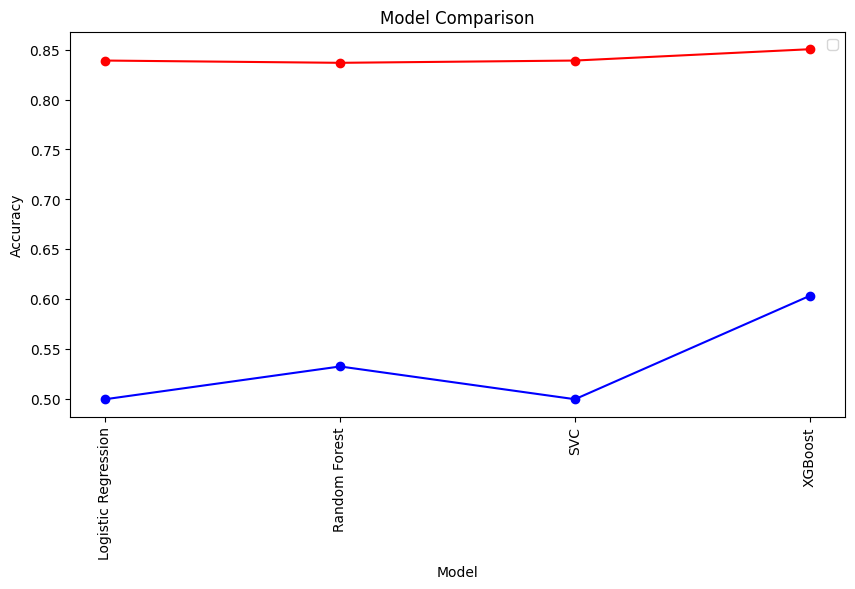

In [ ]:


plt.figure(figsize=(10, 5))
plt.plot(model_comparison['Model'], model_comparison['Accuracy'], color='red', marker='o')
plt.plot(model_comparison['Model'], model_comparison['ROC AUC'], color='blue', marker='o')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.show()